In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt 
from ta_utils import *
from sklearn.decomposition import PCA

In [2]:
#df=getReturn(stocks=stc,s_args={'period':'5y','interval':'1d'}).dropna()
us_stc = ["TSLA","GOOGL","META","AMZN","NVDA"]
df=getReturn(stocks=us_stc,s_args={'period':'5y','interval':'1d'}).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# PCA 

<Axes: >

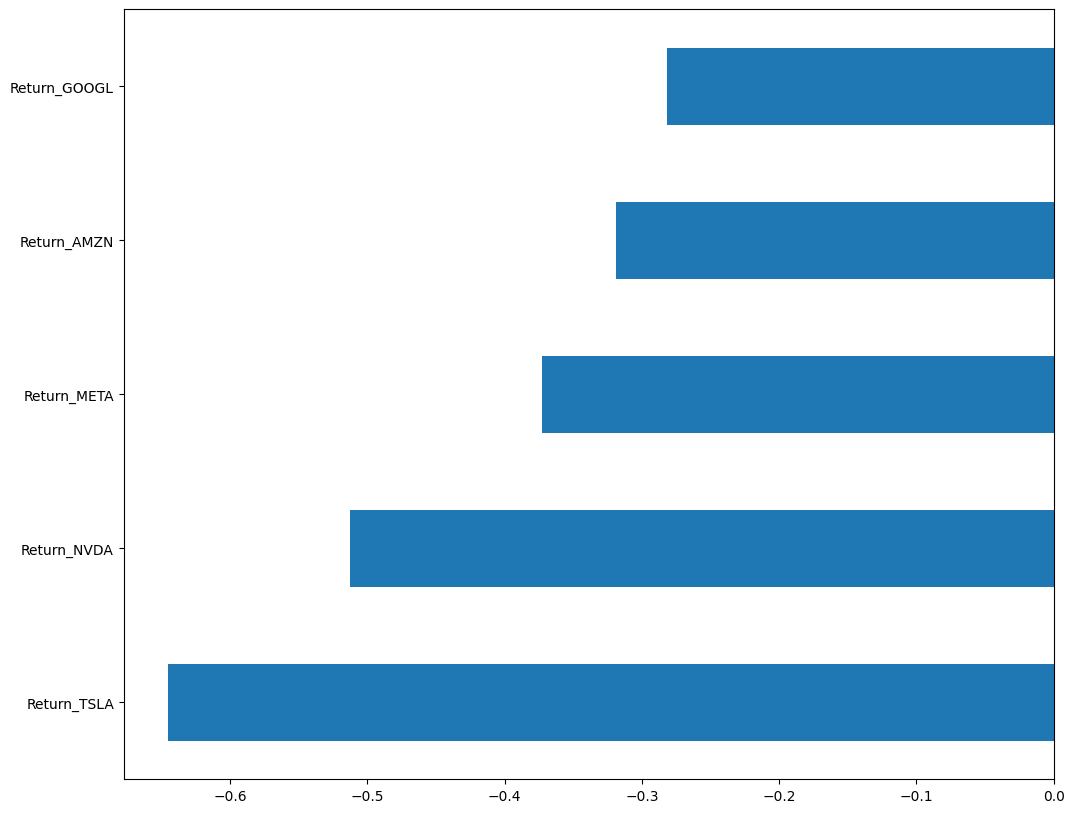

In [3]:
getComponentDataByStock(df)['PC1'].sort_values().plot(kind='barh',figsize=(12,10))

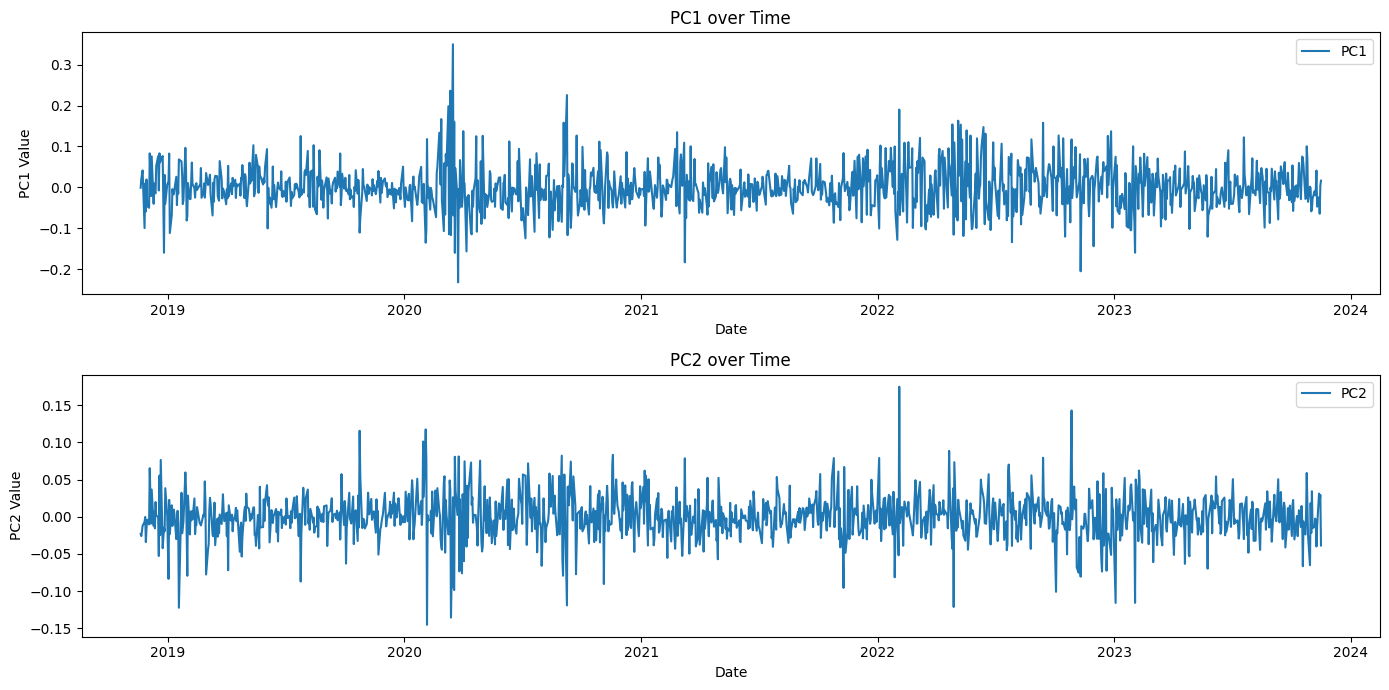

In [4]:
visualizePcaByDate(getComponentDataByDate(df))
# bunun kümülatifini çizdirebiliriz
# PC1 endeksine para yatırsak ne kadar getirimiz olurdu, compound degil naive, ort gün sayısına böl ortalama kazanç.
# kaydırmalı yaparsak belli periodların getirisini ölçebiliriz.

## Returns by Different Year Intervals 

In [5]:
df_5=getReturn(stocks=us_stc,s_args={'period':'5y','interval':'1d'}).dropna()
df_1=getReturn(stocks=us_stc,s_args={'period':'1y','interval':'1d'}).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
s5=getComponentDataByStock(df_5)

In [7]:
s5

,PC1,PC2
Return_TSLA,-0.645350,0.749528
Return_GOOGL,-0.281738,-0.255960
Return_META,-0.372924,-0.462953
Return_AMZN,-0.319263,-0.246659
Return_NVDA,-0.512978,-0.312292


In [8]:
s1=getComponentDataByStock(df_1)

<Axes: >

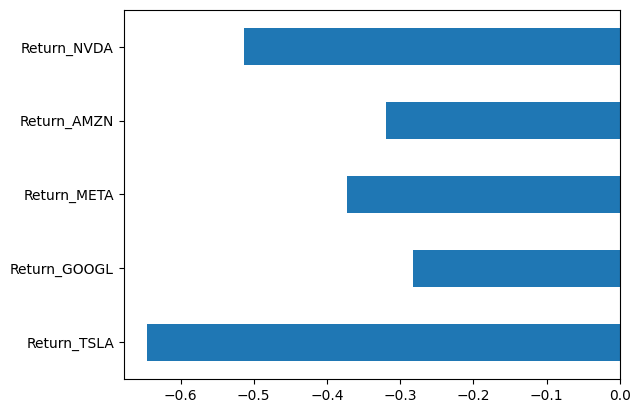

In [9]:
s5['PC1'].plot(kind='barh')

<Axes: >

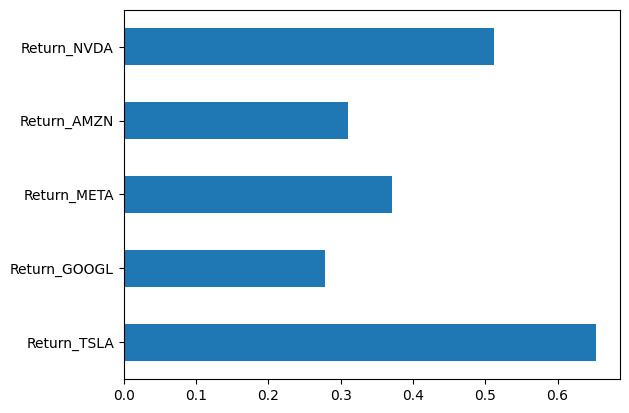

In [10]:
s1['PC1'].plot(kind='barh')

## PCA Backtesting Returns 

In [11]:
df_1

,Return_TSLA,Return_GOOGL,Return_META,Return_AMZN,Return_NVDA
Date,,,,,
2022-11-18,-0.016403,-0.009500,0.005369,-0.007514,-0.017243
2022-11-21,-0.070822,-0.018961,-0.019738,-0.018007,-0.005988
2022-11-22,0.012079,0.015054,0.014280,0.007972,0.045998
2022-11-23,0.075310,0.014424,0.007153,0.009929,0.029550
2022-11-25,-0.001858,-0.010208,-0.007422,-0.007678,-0.015188
...,...,...,...,...,...
2023-11-10,0.021996,0.017883,0.025320,0.020834,0.029073
2023-11-13,0.041342,-0.003778,0.001277,-0.006780,0.005879
2023-11-14,0.059438,0.011516,0.021398,0.022262,0.021084


In [12]:
for c in list(df_1.columns):
    df_1[f'{c}_cumulative']=df_1[c].cumsum()
    
for c in list(df_5.columns):
    df_5[f'{c}_cumulative']=df_5[c].cumsum()

In [13]:
pc=getComponentDataByDate(df_5)

In [14]:
pc

,PC1,PC2
Date,,
2018-11-20,2.151118,0.362442
2018-11-21,2.181500,0.339784
2018-11-23,2.217094,0.348257
2018-11-26,2.123543,0.307936
2018-11-27,2.127976,0.314629
...,...,...
2023-11-10,-1.396179,-0.513357
2023-11-13,-1.430501,-0.496724
2023-11-14,-1.497287,-0.505282


In [15]:
pc['cumsum1']=pc['PC1'].cumsum()
pc['cumsum2']=pc['PC2'].cumsum()

<Axes: xlabel='Date'>

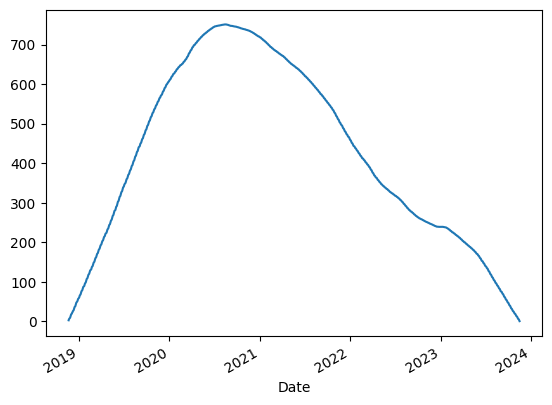

In [16]:
pc['cumsum1'].plot()

<Axes: xlabel='Date'>

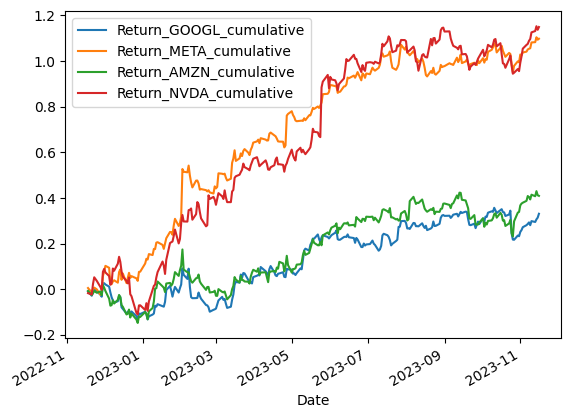

In [17]:
df_1[[ 'Return_GOOGL_cumulative',
       'Return_META_cumulative', 'Return_AMZN_cumulative',
       'Return_NVDA_cumulative']].plot()